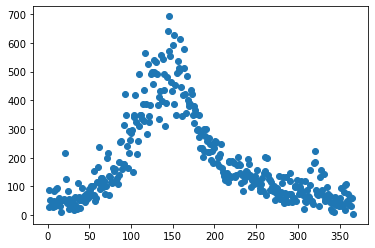

In [31]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel

w=pd.read_csv("1950-2020_all_tornadoes.csv")




x=np.linspace(1,366,366)
days=np.zeros([366,1])

year={}
year['1']=0
year['2']=31
year['3']=59
year['4']=90
year['5']=120
year['6']=151
year['7']=181
year['8']=212
year['9']=243
year['10']=273
year['11']=304
year['12']=334

for i in range(len(w['mo'])):
    day=int(w['dy'][i])
    month=str(w['mo'][i])
    mm=year[month]
    ww=day+mm
    if str(w['mo'][i])=='2'and str(w['dy'][i])=='29' or w['yr'][i]%4==0 and str(w['mo'][i])!='1' and str(w['mo'][i])!='2':
        ww=ww+1
    days[ww-1]=days[ww-1]+1
plt.plot(x,days,'o')




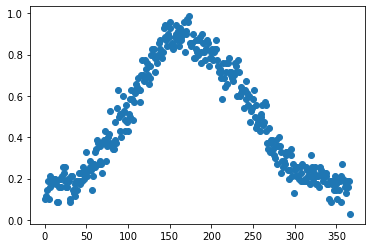

In [32]:
lista=[]
days=np.zeros([366,1])

for i in range(len(w['mo'])):
    if w['date'][i] not in lista:
        lista.append(w['date'][i])
        day=int(w['dy'][i])
        month=str(w['mo'][i])
        mm=year[month]
        ww=day+mm
        if str(w['mo'][i])=='2'and str(w['dy'][i])=='29' or w['yr'][i]%4==0 and str(w['mo'][i])!='1' and str(w['mo'][i])!='2':
            ww=ww+1
        days[ww-1]=days[ww-1]+1
plt.plot(x,days/70,'o')

In [33]:
model1_ppc=CmdStanModel(stan_file='model1_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [34]:
m1=model1_ppc.sample(iter_sampling=100000,chains=1)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [35]:
mu1=m1.stan_variable('mu')
sigma1=m1.stan_variable('sigma')
prob1=m1.stan_variable('prob')

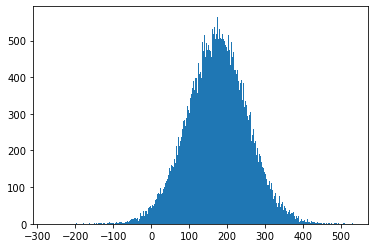

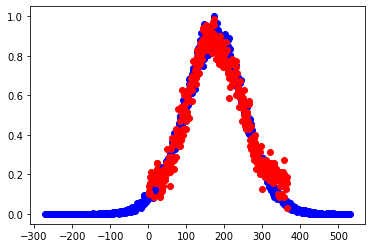

In [36]:
mini=1000
maxi=0
for i in prob1:
    if i<mini:
        mini=i
    if i>maxi:
        maxi=i
bins=int(abs(maxi-mini))
u=plt.hist(prob1,bins=bins)

plt.figure()
plt.plot(u[1][:-1],u[0]/max(u[0]),'bo')
plt.plot(x,days/70,'ro')

In [37]:
model1_fit=CmdStanModel(stan_file='model1_fit.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [42]:
y=np.linspace(1,366,366)
for i in range(len(y)):
    y[i]=days[i]
data=dict(N=len(x),probs=x)
m2=model1_fit.sample(data=data,iter_sampling=100000,chains=1)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [43]:
mu2=m2.stan_variable('mu')
sigma2=m2.stan_variable('sigma')
prob2=m2.stan_variable('prob')

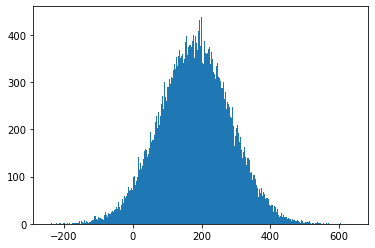

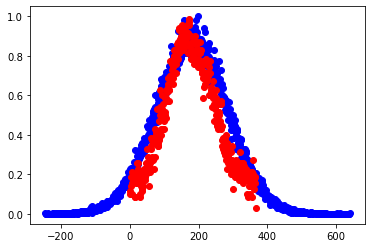

In [44]:
mini=1000
maxi=0
for i in prob2:
    if i<mini:
        mini=i
    if i>maxi:
        maxi=i
bins2=int(abs(maxi-mini))
u2=plt.hist(prob2,bins=bins2)

plt.figure()
plt.plot(u2[1][:-1],u2[0]/max(u2[0]),'bo')
plt.plot(x,days/70,'ro')

In [41]:
#nic ważnego - nie usuwać
n1=np.zeros([366,1])
for i in b:
    i=int(i)
    if 1<=i<=366:
        n1[i-1]=n1[i-1]+1
        
plt.plot(x,days,'ob')
plt.plot(x,n1*14,'or')

NameError: name 'b' is not defined

In [ ]:
#nic ważnego - nie usuwać
n2=np.zeros([366,1])
for i in b2:
    i=int(i)
    if 1<=i<=366:
        n2[i-1]=n2[i-1]+1

n3=np.zeros([366,1])
for i in b3:
    i=int(i)
    if 1<=i<=366:
        n3[i-1]=n3[i-1]+1        
        
plt.plot(x,days,'ob')
plt.plot(x,(n2+n3)*14,'or')